# Lab 08: Local Histogram Analysis
Name: **Raja Hasnain Anwar**<br/>
Registration: **192135**

# Definitions

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
image = cv2.imread('lab8.png',0)

In [3]:
def hist_eq(img):
    height, width = img.shape
    size = height*width
    L = 256 # gray levels
    counts = [0] * L
    cummulative = [0] * L
    Ts = [0] * L
    
    # getting counts
    for y in range(height):
        for x in range(width):
            px = img[x,y]
            counts[px] += 1

    # converting count to probabilites and cummulating
    for i in range(L):
        if i!= 0:
            cummulative[i] = (counts[i]/size)+cummulative[i-1]
        else:
            cummulative[i] = (counts[i]/size)
            
    # finding T i.e., transformed values
    for i in range(L):
        Ts[i] = cummulative[i]*(L-1)
    
    # redistributing transformed values
    for y in range(height):
        for x in range(width):
            px = img[x,y]
            img[x,y] = round(Ts[px])
    
    return img

# Original

## Images

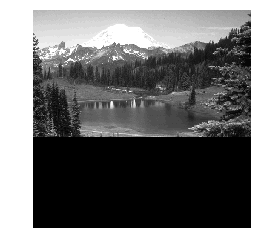

In [4]:
plt.axis('off')
plt.imshow(image, cmap='gray')
plt.show()

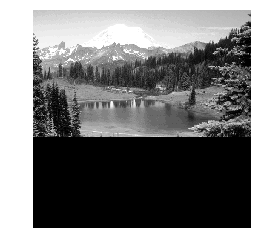

In [5]:
equalized = hist_eq(image.copy())

plt.axis('off')
plt.imshow(equalized, cmap='gray')
plt.show()

## Histogram

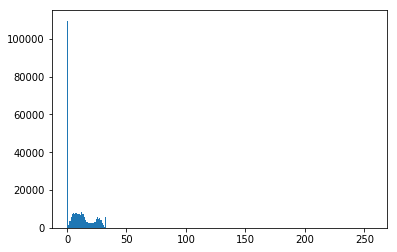

In [6]:
plt.hist(image.ravel(),256,[0,256]); plt.show()

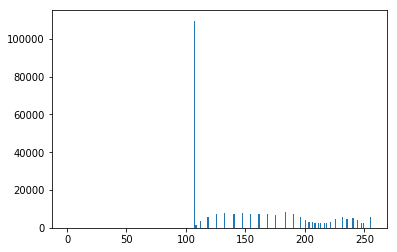

In [7]:
plt.hist(equalized.ravel(),256,[0,256]); plt.show()

# Task 01

In [8]:
height, width = image.shape
midy, midx = height//2, width//2

# tiles = list of (start, end) pixel values each in y,x notation as supported by cv2
tiles = [[(0,0),(midy,midx)],
         [(0,midx),(midy,width)],
         [(midy,0),(height,midx)],
         [(midy,midx),(height, width)]]

In [9]:
equalized_separate = []
for i in range(len(tiles)):
    print('Equalizing tile',i+1)
    equalized_separate.append( hist_eq(image[ tiles[i][0][0]:tiles[i][1][0], tiles[i][0][1]:tiles[i][1][1] ].copy()) )

Equalizing tile 1
Equalizing tile 2
Equalizing tile 3
Equalizing tile 4


Combining equalized tiles

In [10]:
top = np.hstack((equalized_separate[0], equalized_separate[1]))
bottom = np.hstack((equalized_separate[2], equalized_separate[3]))
equalized_tiles = np.vstack((top, bottom))

## Images

Original


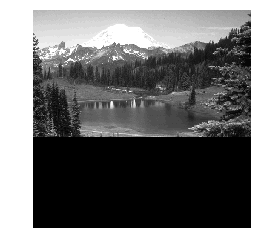

Equalized using tiles


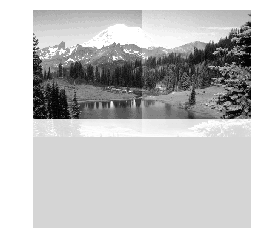

In [11]:
print('Original')
plt.axis('off')
plt.imshow(image, cmap='gray')
plt.show()

print('Equalized using tiles')
plt.axis('off')
plt.imshow(equalized_tiles, cmap='gray')
plt.show()

## Histogram

Original


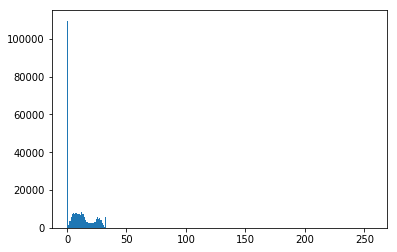

Equalized using tiles


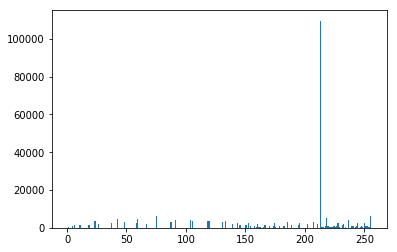

In [12]:
print('Original')
plt.hist(image.ravel(),256,[0,256]); plt.show()

print('Equalized using tiles')
plt.hist(equalized_tiles.ravel(),256,[0,256]); plt.show()

We can see that the image has been enhanced uniformly in the space because different tiles have different gray distribution. However, there's a clear boundry between different tiles which make the image look like it has  been cut, i.e., doesn't look continuous.

# Task 02

## Run 1

In [13]:
window_size = 32

In [14]:
out = image.copy()

for y in range(height-window_size):
    for x in range(width-window_size):
        equalized_window = cv2.equalizeHist( image[y:y+window_size, x:x+window_size].copy() )
        out[y:y+window_size, x:x+window_size] = equalized_window

Original


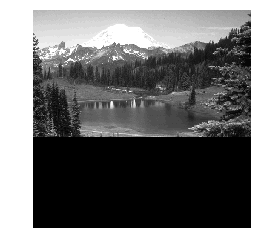

Equalized using sliding window


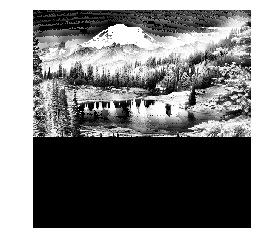

In [15]:
print('Original')
plt.axis('off')
plt.imshow(image, cmap='gray')
plt.show()

print('Equalized using sliding window')
plt.axis('off')
plt.imshow(out, cmap='gray')
plt.show()

## Histogram

Original


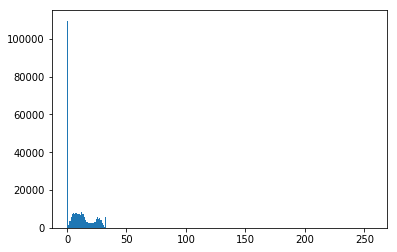

Equalized using sliding window


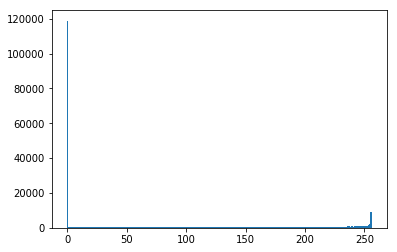

In [16]:
print('Original')
plt.hist(image.ravel(),256,[0,256]); plt.show()

print('Equalized using sliding window')
plt.hist(out.ravel(),256,[0,256]); plt.show()

## Run 2

In [17]:
window_size = 64

In [18]:
out = image.copy()

for y in range(height-window_size):
    for x in range(width-window_size):
        equalized_window = cv2.equalizeHist( image[y:y+window_size, x:x+window_size].copy() )
        out[y:y+window_size, x:x+window_size] = equalized_window

Original


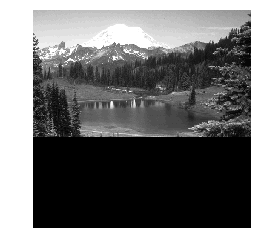

Equalized using sliding window


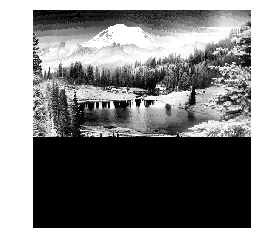

In [19]:
print('Original')
plt.axis('off')
plt.imshow(image, cmap='gray')
plt.show()

print('Equalized using sliding window')
plt.axis('off')
plt.imshow(out, cmap='gray')
plt.show()

## Histogram

Original


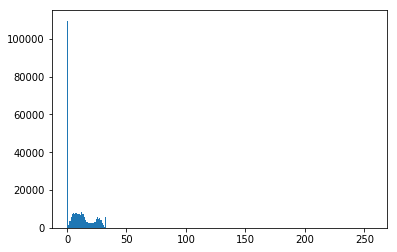

Equalized using sliding window


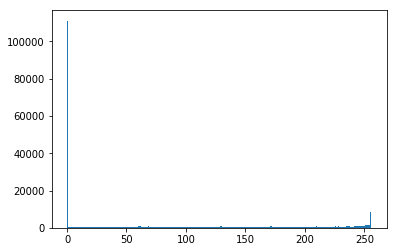

In [20]:
print('Original')
plt.hist(image.ravel(),256,[0,256]); plt.show()

print('Equalized using sliding window')
plt.hist(out.ravel(),256,[0,256]); plt.show()

# Run 3: Final

In [21]:
window_size = 128

In [28]:
out = image.copy()

for y in range(height-window_size):
    for x in range(width-window_size):
        equalized_window = hist_eq( image[y:y+window_size, x:x+window_size].copy() )
        out[y:y+window_size, x:x+window_size] = equalized_window

Original


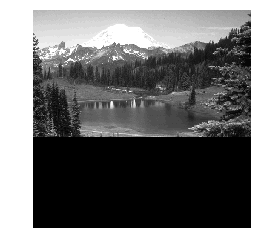

Equalized using sliding window


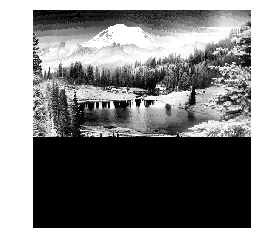

In [22]:
print('Original')
plt.axis('off')
plt.imshow(image, cmap='gray')
plt.show()

print('Equalized using sliding window')
plt.axis('off')
plt.imshow(out, cmap='gray')
plt.show()

## Histogram

Original


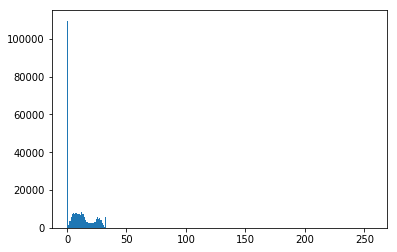

Equalized using sliding window


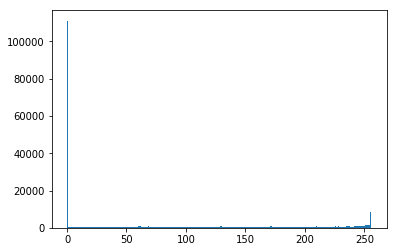

In [23]:
print('Original')
plt.hist(image.ravel(),256,[0,256]); plt.show()

print('Equalized using sliding window')
plt.hist(out.ravel(),256,[0,256]); plt.show()

# Comments

It is oberseved that tiling approach uses very large windows which first result in boundry-like strucutre. To make it look continuous, we apply sliding window technique. For a very small window size, the output is not very convenient because it uses ver small portion of the image and distorts the image overall. However, with large window sizes, the information-rich areas of the image are enhanced and very sharp and clear. This is because large window size uses an adequate local as well global amount of information.